<a href="https://colab.research.google.com/github/whyb2nrml/KNOU/blob/main/%EC%A7%80%EB%8A%A5%ED%98%95%EC%A0%95%EB%B3%B4%EC%B2%98%EB%A6%AC%EC%8B%9C%EC%8A%A4%ED%85%9C_3%EA%B0%95_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98_%ED%86%B5%EA%B3%84%EC%A0%81_%EB%B6%84%EC%84%9D_%EC%A0%90%EA%B2%80%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. 두 클래스 집합 C1, C2는 각각 다음과 같은 평균과 공분산을 가지는 가우시안 분포를 따른다. 각 클래스별로 데이터를 100개씩 생성하시오. 생성된 데이터를 2차원 평면상의 점의 위치에 대해 설명하시오.

In [2]:
import numpy as np
from scipy.linalg import sqrtm
from scipy.stats import norm
import matplotlib.pyplot as plt

In [5]:
n = 100 # 데이터 개수

# 평균 생성
m1 = np.full((n,2), [0, 0]) 
m2 = np.full((n,2), [4, 4])

# 공분산 생성
s = np.full((2,2), [[1,0], [0,2]])

# 가우시안 분포를 따르는 데이터 생성
x1 = np.random.normal(0, 1, size=(n, 2))
x1 = np.dot(x1, sqrtm(s)) + m1
x2 = np.random.normal(0, 1, size=(n, 2))
x2 = np.dot(x2, sqrtm(s)) + m2

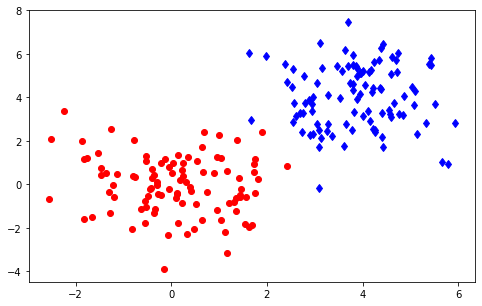

In [12]:
# 데이터 산점도 그리기
plt.figure(figsize=(8, 5))
plt.plot(x1[:, 0], x1[:, 1], 'ro', x2[:, 0], x2[:, 1], 'bd')
plt.show()

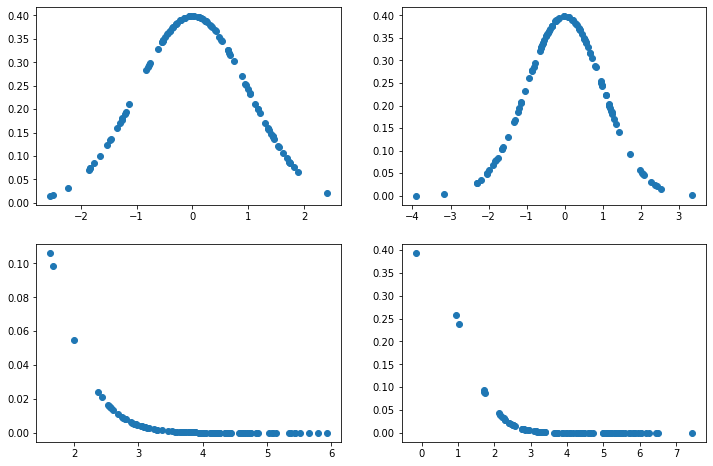

In [30]:
# x1, x2의 x좌표값과 y좌표값의
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.scatter(x1[:, 0], norm.pdf(x1[:, 0]) )
plt.subplot(2,2,2)
plt.scatter(x1[:, 1], norm.pdf(x1[:, 1]) )
plt.subplot(2,2,3)
plt.scatter(x2[:, 0], norm.pdf(x2[:, 0]) )
plt.subplot(2,2,4)
plt.scatter(x2[:, 1], norm.pdf(x2[:, 1]) )
plt.show()

Q2. 각 클래스의 데이터 분포가 가우시안 함수를 따른다는 가정 하에, 1번에서 생성한 데이터 집합을 이용하여 각 클래스의 확률밀도함수 p(x|Ci)의 u1와 ∑1를 추정하시오.

In [33]:
u11 = x1[:, 0].mean()
u12 = x1[:, 1].mean()
u21 = x2[:, 0].mean()
u22 = x2[:, 1].mean()
print(u11, u12, u21, u22)

0.08823689221548464 -0.03223122172988358 3.851895359356928 4.023392061847787


Q3. 1번에서 사용한 데이터에 대해, 커널 밀도함수 추정법에 의해 밀도함수를 추정하고자 한다. 다음을 각각 수행하시오

파젠창 방법을 사용하여 밀도함수를 추정하되, 값을 여러 가지로 변형시켜 보면서 얻어지는 결과를 비교해 보시오.

가우시안 커널 방법을 사용하여 밀도함수를 추정하되, 값을 여러 가지로 변형시켜 보면서 얻어지는 결과를 비교해 보시오.


3-1. 파젠창

In [120]:
n = 500 # 데이터 수 설정
h1 = 0.5 # h값(막대폭) 설정
h2 = 1 
X = np.random.normal(0, 1, size=(n, 2))

In [121]:
a = np.linspace(-3, 3, 61)
x, y = np.meshgrid(a, a) # 입력공간 설정

In [122]:
# 입력공간의 모든 입력에 대해 확률밀도값 계산 : h=0.5 일 때
k = np.full(x.shape, 0) # 커널함수 결과값 저장할 공간
for i in range(x.shape[0]):
  for j in range(x.shape[0]):
    k[i, j] = 0
    # 커널함수 값 계산
    for l in range(n):
      if ( abs(X[l, 0] - x[i, j]) < (h1/2) ) and ( abs(X[l, 1] - y[i, j]) < (h1/2) ):
        k[i, j] = k[i, j] + 1

pyxp1 = k/(h1**2*n)

In [123]:
# 입력공간의 모든 입력에 대해 확률밀도값 계산 : h=1.0 일 때
k = np.full(x.shape, 0) # 커널함수 결과값 저장할 공간
for i in range(x.shape[0]):
  for j in range(x.shape[0]):
    k[i, j] = 0
    # 커널함수 값 계산
    for l in range(n):
      if ( abs(X[l, 0] - x[i, j]) < (h2/2) ) and ( abs(X[l, 1] - y[i, j]) < (h2/2) ):
        k[i, j] = k[i, j] + 1

pyxp2 = k/(h2**2*n)

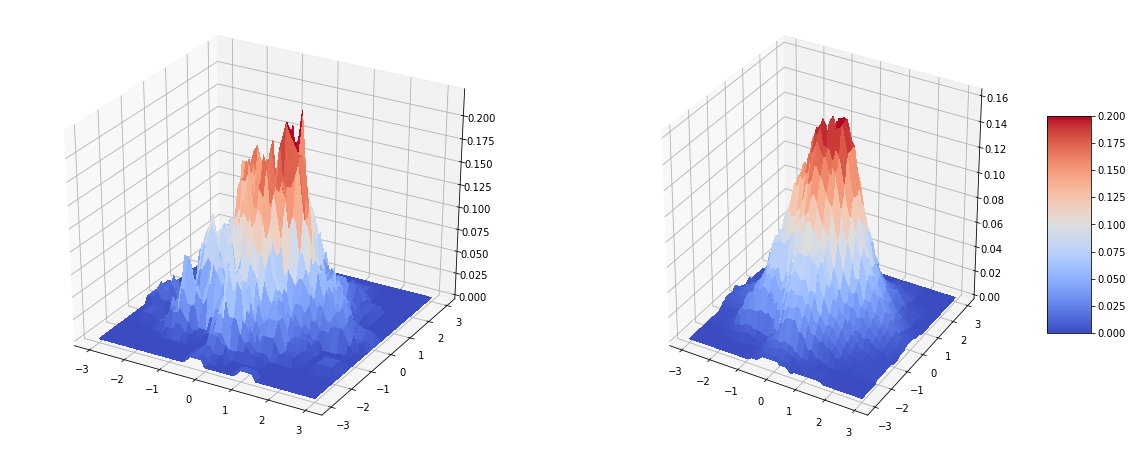

In [139]:
# 시각화
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,8))
# fig = plt.figure(figsize=plt.figaspect(0.3))
fig = plt.figure(figsize=(20,8))

# Plot the surface.
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax.plot_surface(x, y, pyxp1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax.plot_surface(x, y, pyxp2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 0.5)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf1, shrink=0.5, aspect=5)
# ax.view_init(30, 150)
# plt.draw()
plt.show()
# rotate the axes and update

3-2. 가우시안 커널 방법

In [198]:
n = 500 # 데이터 수 설정
h1 = 0.5 # h값(막대폭) 설정
h2 = 1 
X = np.random.normal(0, 1, size=(n, 2))

In [199]:
a = np.linspace(-3, 3, 61)
x, y = np.meshgrid(a, a) # 입력공간 설정

In [200]:
# 입력공간의 모든 입력에 대해 확률밀도값 계산 : h=0.5 일 때
k = np.full(x.shape, 0) # 커널함수 결과값 저장할 공간
for i in range(x.shape[0]):
  for j in range(x.shape[0]):
    txy = [x[i, j], y[i, j]]
    # 커널함수 값 계산
    ksum = []
    for l in range(n):
      ksum.append( (np.exp((- np.dot( (X[l, :] - txy), (X[l, :] - txy) )) / (2*h1**2) ) ) / (2*np.pi) )
    k[i, j] = np.sum(ksum)

pyxp1 = k/(h1**2*n)

In [201]:
# 입력공간의 모든 입력에 대해 확률밀도값 계산 : h=1 일 때
k = np.full(x.shape, 0) # 커널함수 결과값 저장할 공간
for i in range(x.shape[0]):
  for j in range(x.shape[0]):
    txy = [x[i, j], y[i, j]]
    # 커널함수 값 계산
    ksum = []
    for l in range(n):
      ksum.append( (np.exp((- np.dot( (X[l, :] - txy), (X[l, :] - txy) )) / (2*h2**2) ) ) / (2*np.pi) )
    k[i, j] = np.sum(ksum)

pyxp2 = k/(h2**2*n)

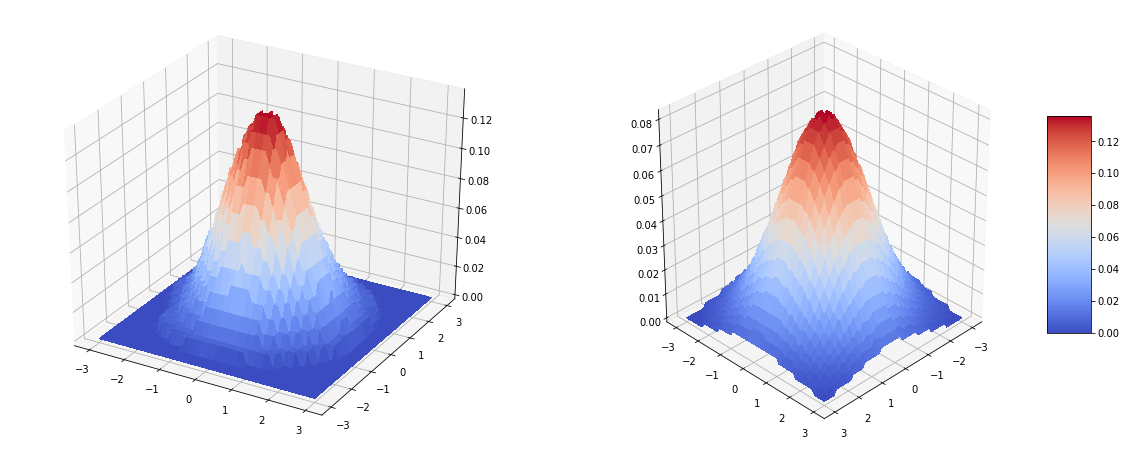

In [203]:
# 시각화
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,8))
# fig = plt.figure(figsize=plt.figaspect(0.3))
fig = plt.figure(figsize=(20,8))

# Plot the surface.
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax.plot_surface(x, y, pyxp1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax.plot_surface(x, y, pyxp2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(0, 0.5)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf1, shrink=0.5, aspect=5)
ax.view_init(30, 45)
# plt.draw()
plt.show()
# rotate the axes and update